C221011 김수민

## 비선형 회귀분석

비선형 회귀모형
- 비선형이 심하지 않은 경우
    - 비선형성을 무시하고 선형으로 가정
- 비선형성이 심한 경우
    - (변수변환) 변수변환을 통해 비선형을 선형으로 변환하여 분석한 후, 다시 역변환하여 비선형에서 해석
    - (pice-wise linear) 비선형을 구간으로 나누어 각 구간별로 선형 분석 방법을 적용
    - (비선형) 비선형방법을 적용
*선형모형이 기본임

회귀 모형의 종류
- 단변량-단순-선형 회귀모형을 기본으로 하여 가ㅏ정을 추가하거나 제거하여 다양한 회귀 모형이 있음


### Pasty 패키지
- pasty 패키지는 통계 모형을 묘사하기 위한 파이썬 라이브러리
    - statsmodels 패키지 설치 시 자동으로 설치됨
- 문자열 수식(formula)을 해석하여 함수에 적용 가능하도록 하는 기능 제공
- 데이터를 조합하여 생성하거나 정규화하는 등의 전처리 기능을 제공(전처리 시에는 pandas나 머신러닝 시에는 scikit learn 기능 사용이 더 편리함)

formula 작성법
- y~a*b*c-a:b:c=y~a+b+c+a:b+a:c+b:c
- y~(a+b):(c+d)=y~a:c+a:d+b:c+b:d
- `~` : 종속변수와 독립변수를 구분
- `+` : 모형에 추가
- `*` : 변수 및 교호작용
- `-` : 모형에서 제외
- `:` : 교호작용
- `I()` : 새로운 독립변수 생성
- `C()` : 범주형 변수
- `0` : 절편제외
- `1` : 절편추가(디폴트)

변수의 변환
- 독립변수 혹은 종속 변수에 특정한 함수를 적용하여 모형의 정규성, 선형성, 등분산성을 보정
    - 종속변수의 변환: 주로 정규성, 등분산성을 위반한 경우 사용
    - 독립변수의 변환: 주로 선형성을 위반한 경우 사용

np.random.rand(n)은 NumPy에서 무작위로 0 이상 1 미만의 실수를 n개 생성하는 함수     
np.random.randn(n)은 표준 정규분포(평균 0, 표준편차 1)를 따르는 난수를 n개 생성 

더미변수를 이용한 회귀분석
- 더미변수는 범주형 변수를 연속형 변수로 변환하여 회귀분석에 사용하는 방법
- 회귀분석은 비율척도나 등간척도의 연속형 변수에만 적용 가능
    - 범주형 변수는 연속형 변수인 더미변수로 변환하여 회귀분석에 적용

데이터준비
- 이완기 혈압(DBP, 종속변수)에 따른 수축기 혈압(SBP, 독립변수)의 회귀분석 
    - 측정 시간에 따라 혈압이 달라짐
        - 0: 기상직후, 1: 오전 10시, 2: 오후 4시, 3: 취침 전
- 데이터를 가상으로 생성하여 회귀부석을 수행
$$ SBP=15.0 + 1.2\times DBP + \varepsilon $$

In [42]:
np.repeat([0,1,2,3],2)

array([0, 0, 1, 1, 2, 2, 3, 3])

In [43]:
import numpy as  np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n=10
np.random.seed(42)

df=pd.DataFrame({
    'DBP': np.random.normal(90,10,n*4),
    'time': np.repeat([0,1,2,3],n)
})

#수축기혈압
sbp_0=10.0+1.2*df['DBP'][0:n]+np.random.randint(-15,15,n)
sbp_1=15.0+1.3*df['DBP'][n:2*n]+np.random.randint(-15,15,n)
sbp_2=20.0+1.3*df['DBP'][2*n:3*n]+np.random.randint(-15,15,n)
sbp_3=5.0+1.2*df['DBP'][3*n:4*n]+np.random.randint(-15,15,n)
df['SBP']=pd.concat([sbp_0,sbp_1,sbp_2,sbp_3],axis=0)

df.head()

,DBP,time,SBP
0,94.967142,0,125.960570
1,88.617357,0,126.340828
2,96.476885,0,121.772262
3,105.230299,0,122.276358
4,87.658466,0,109.190160


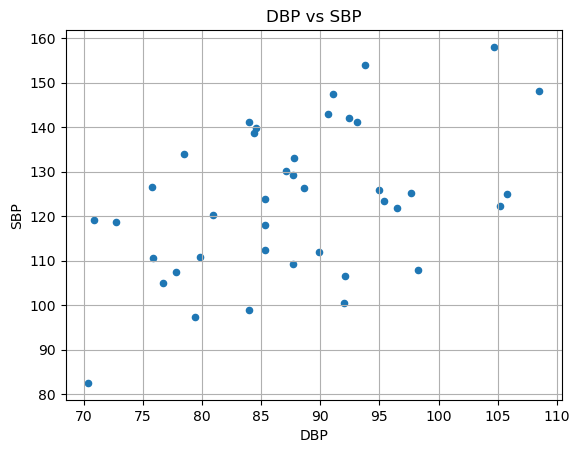

In [44]:
df.plot(x='DBP',y='SBP',kind='scatter')
plt.title('DBP vs SBP')
plt.xlabel('DBP')
plt.ylabel('SBP')
plt.grid(True)
plt.show()

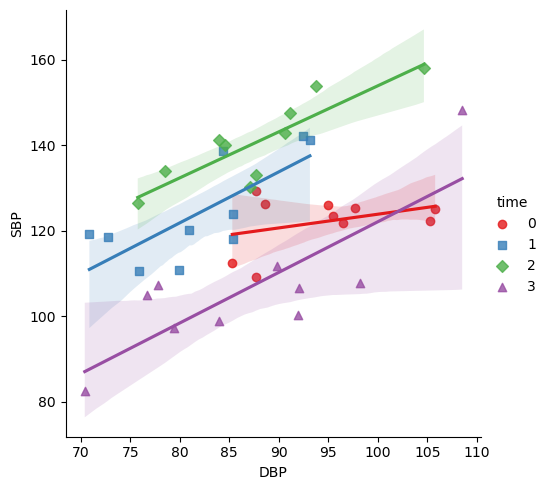

In [45]:
#seaborn의 lmplot을 사용하면 회귀선과 신뢰구간까지 그려준다
sns.lmplot(
    data=df,
    x='DBP',
    y='SBP',
    hue='time',
    markers=['o','s','D','^'],
    palette='Set1'
);

시간대별로 데이터의 기울기가 차이가 있다.

단순선형회귀분석 적용

In [46]:
import statsmodels.formula.api as smf
formula='SBP~DBP'
model=smf.ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     9.669
Date:                Mon, 07 Jul 2025   Prob (F-statistic):            0.00354
Time:                        20:56:06   Log-Likelihood:                -164.53
No. Observations:                  40   AIC:                             333.1
Df Residuals:                      38   BIC:                             336.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.7646     22.530      2.386      0.0

결정계수 값이 0.203으로 작다. 적합한 모형이라 보기 어렵다.      
Kurtosis도 3과 차이가 많이 나서 정규성 조건이 만족한다 보기 어렵다.     
Durbin-Watson값도 0.791로 작게 나왔기 때문에 독립성을 만족한다 보기 어렵다.

산점도와 회귀선 그리기

Text(0.5, 1.0, 'SBP vs. DBP')

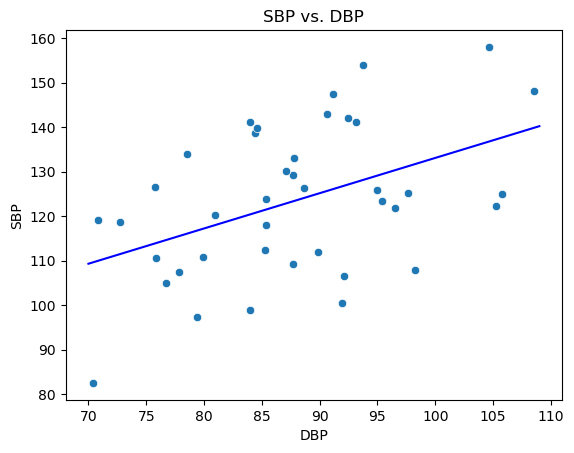

In [47]:
sns.scatterplot(
    data=df,
    x='DBP',
    y='SBP',
);
#회귀선을 그리기 위한 데이터프레임 생성
#DBP의 범위 설정
x=range(70,110)

#예측값 계산을 위한 데이터프레임 생성
y=pd.DataFrame({'DBP':x})

#회귀선 그리기
plt.plot(x,model.predict(y),color='blue')

plt.xlabel('DBP')
plt.ylabel('SBP')
plt.title('SBP vs. DBP')

더미 변수를 적용한 회귀분석
- time변수를 더미 변수로 변환(C(time))하여 회귀분석 수행
    - 범주형 변수가 여러개인 경우,  축소랭크 방식을 사용
    - 축소랭크 방식에서는 특정한 하나의 범주값을 기준값으로 하고 기준값에 각 더미변수 계수를 상수로 회귀모형에 추가
        - 여기서는 time=0이 기준값으로 설정됨

In [48]:
formula='SBP~DBP+C(time)'
model=smf.ols(formula,data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     33.26
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           1.77e-11
Time:                        20:56:07   Log-Likelihood:                -137.68
No. Observations:                  40   AIC:                             285.4
Df Residuals:                      35   BIC:                             293.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       26.2035     14.761      1.775   

결정계수 값 증가함, 회귀모형의 적합도  증가      
AIC, BIC 값 감소함     
Kurtosis 값 3에 가까워짐, 정규성 확보
Durbin-Watson 값 2에 가까워짐, 독립성 확보

더미변수를 적용하면 더미변수의 수준의 개수만큼 모형의 자유도가 증가하고 회귀선이 증가됨(기울기는 같고 절편만 달라지는 회귀선 네개가 생성됨)




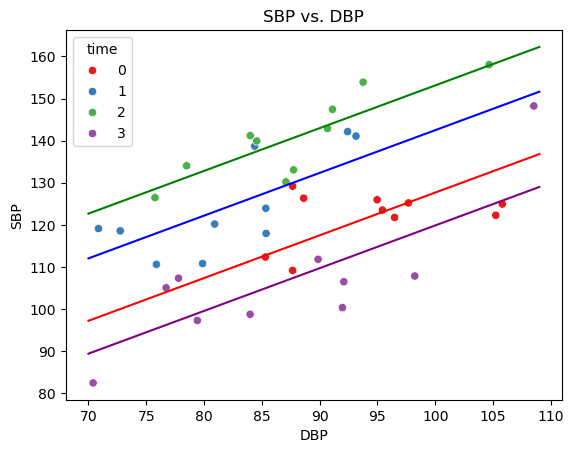

In [49]:
sns.scatterplot(
    data=df,
    x='DBP',
    y='SBP',
    hue='time',
    markers=['o','s','D','^'],
    palette='Set1'
)
#회귀선을 그리기 위한 데이터프레임 생성
#DBP의 범위 설정
x=range(70,110)

#예측값 계산을 위한 데이터프레임 생성
y_0=pd.DataFrame({'DBP':x,'time':0})
y_1=pd.DataFrame({'DBP':x,'time':1})
y_2=pd.DataFrame({'DBP':x,'time':2})
y_3=pd.DataFrame({'DBP':x,'time':3})

#회귀선 그리기
plt.plot(x,model.predict(y_0),label='time=0',color='red')
plt.plot(x,model.predict(y_1),label='time=1',color='blue')
plt.plot(x,model.predict(y_2),label='time=2',color='green')
plt.plot(x,model.predict(y_3),label='time=3',color='purple')

plt.xlabel('DBP')
plt.ylabel('SBP')
plt.title('SBP vs. DBP')
plt.show()

각각의 그룹 별 회귀분석을 해도 되지만 데이터가 적으면 신뢰구간의 폭이 커지게 된다. 고로 하나의 모집단이라 보고 데이터 수가 많은 상태에서 범주형 변수를 고려한다.